### Assignment: When the above application launches we start from the clown pic and then to messi, Inverse this behaviour also add a 100 millisecond delay between frames instead of 150 milliseconds, also wait for 2 seconds instead of 1 when one image becomes fully Opaque, Also exit by pressing Esc instead of q

(420, 560, 3)
(420, 560, 3)


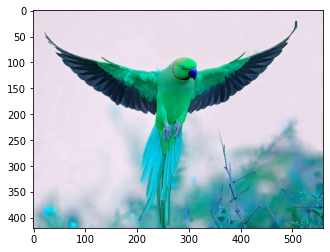

In [67]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
import time

img1 = cv2.imread('parrot1.jpg',1) 
img2= cv2.imread('massi.jpg',1) 
first_image = cv2.resize(img1, (0,0), fx=0.547, fy=0.547) 
second_image = cv2.resize(img2, (560, 420))
plt.imshow(first_image)
print(first_image.shape)
print(second_image.shape)

(768, 1024, 3)
(185, 273, 3)


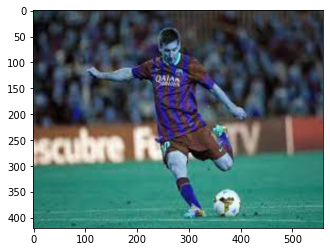

In [69]:
plt.imshow(second_image)
print(img1.shape)
print(img2.shape)

In [75]:
img1_weight = 0

reverse = False # this is used to reverse the wieght 
while 1:

# continue to add or decrease weight 
    if reverse:
        img1_weight -= 0.1 
    else: 
        img1_weight += 0.1

# if img1_weight goes up then img2_weight goes down accordingly and vice vers 
    img2_weight = 1-img1_weight

    dst = cv2.addWeighted(first_image, img1_weight , second_image, img2_weight ,0)

# we will have a 0.15 transition between frames for a smooth transition 
    time.sleep(0.1) 
    cv2.imshow('dst',dst)

# if threshold is reached set reverse to True 
    if img1_weight > 1:

# lets have 1 second wait before reversing 
        time.sleep(2) 
        reverse =True

# if inverse threshold is reached set reverse to False 
    elif img1_weight < 0:
        time.sleep(2)
        reverse =False

    if cv2.waitKey(1) & 0xFF == 27:

        break

cv2.destroyAllWindows()                      


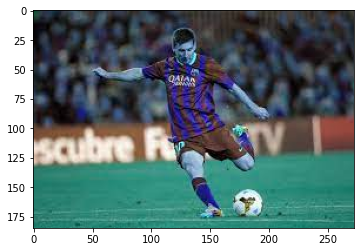

In [90]:
img_logo=cv2.imread('massi.jpg',1)

#%matplotlib notebook
plt.imshow(img_logo)

(45, 45, 3)


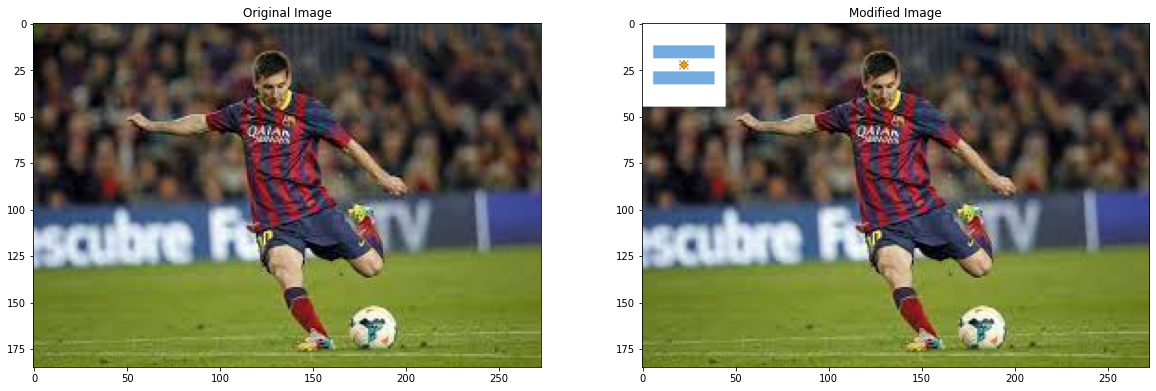

In [92]:
import cv2
import matplotlib.pyplot as plt 
img_logo=cv2.imread('argentina.png',1) 
img_main=cv2.imread('massi.jpg',1) 
original_copy = img_main.copy()

resized_logo = cv2.resize(img_logo, (0,0), fx=0.2, fy=0.2) 
rows,cols,channels = resized_logo.shape # dimensions of resized_logo

# putting logo on top-left corner 
original_copy[0:rows, 0:cols ] = resized_logo

plt.figure(figsize=[20,20])
#%matplotlib inline
plt.subplot(121);plt.imshow(img_main[:,:,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(original_copy[:,:,::-1]);plt.title("Modified Image")
print(resized_logo.shape)

<IPython.core.display.Javascript object>


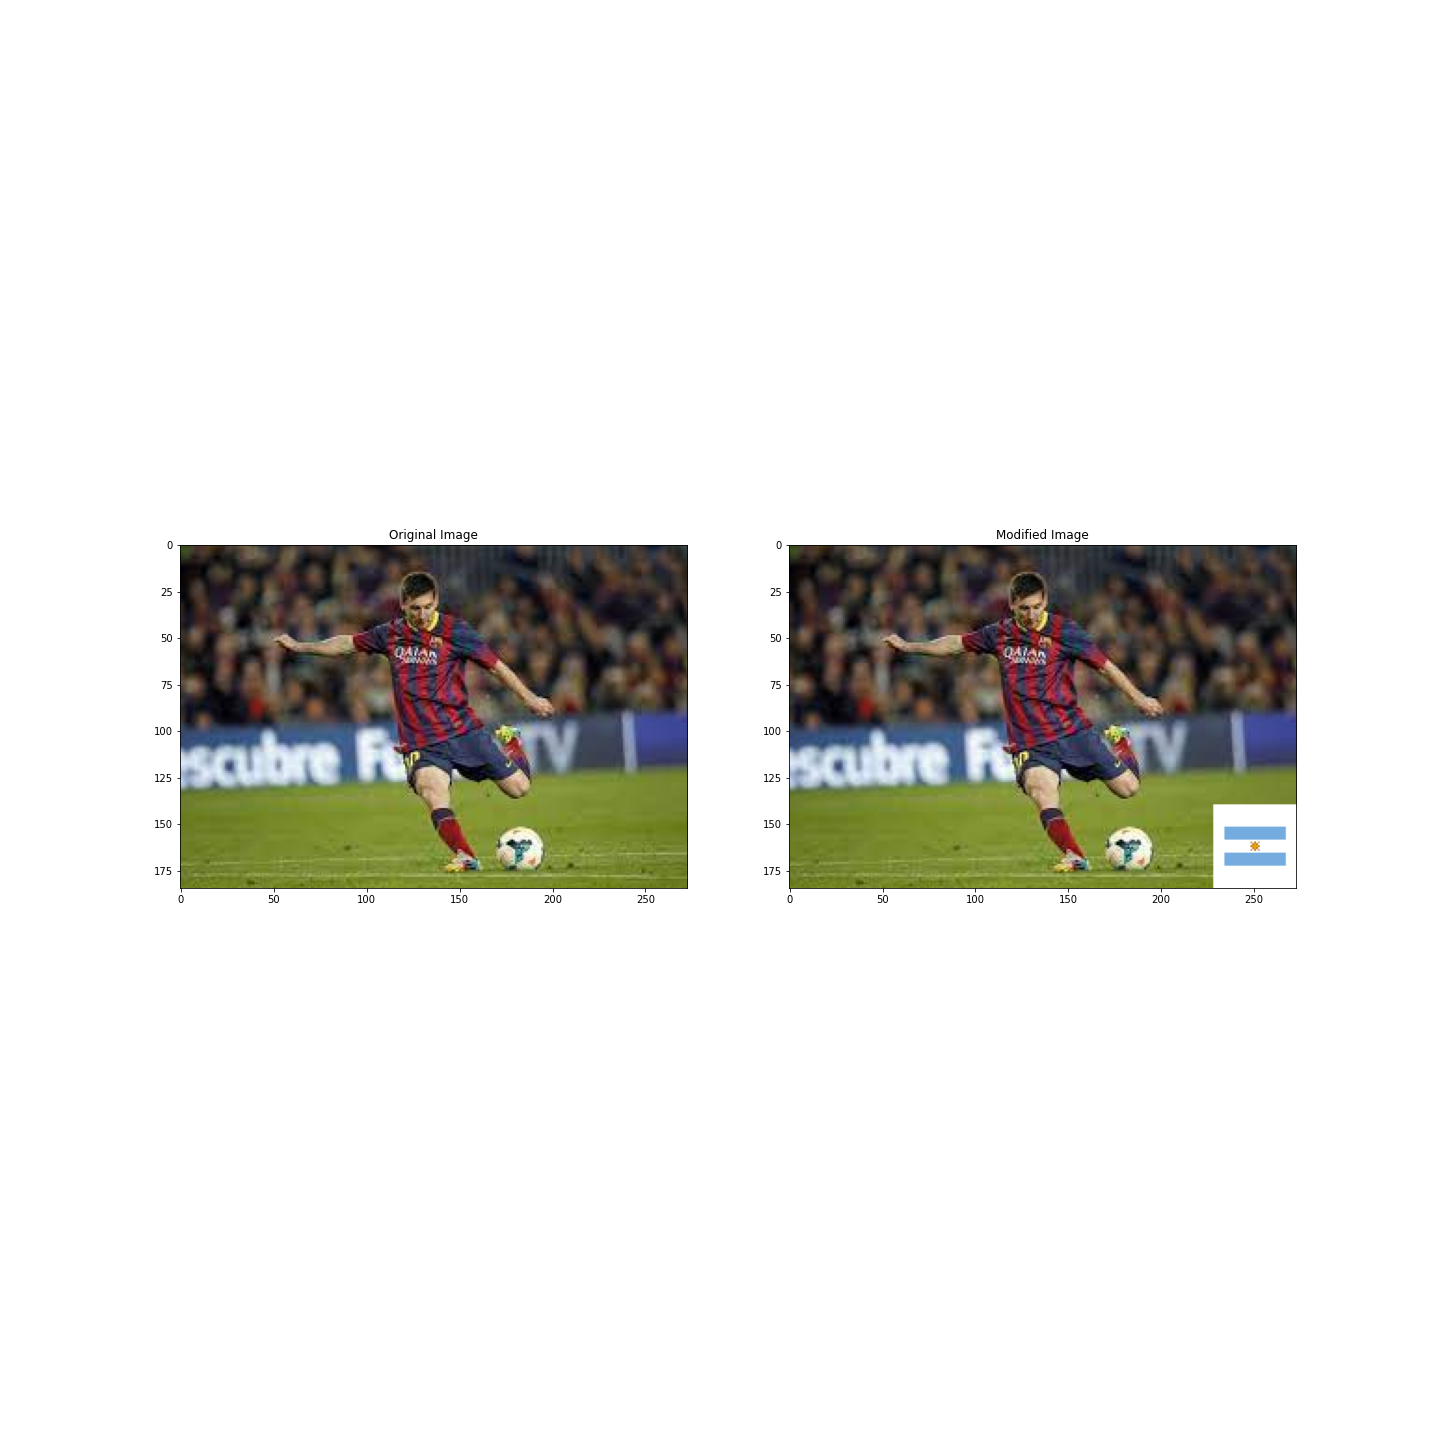

Text(0.5, 1.0, 'Modified Image')

In [113]:
original_copy = img_main.copy()

rows2,cols2,_= img_main.shape # dimensions of main_image 
original_copy[rows2-rows:rows2, cols2-cols:cols2 ] = resized_logo

plt.figure(figsize=[20,20])

plt.subplot(121);plt.imshow(img_main[:,:,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(original_copy[:,:,::-1]);plt.title("Modified Image")

<IPython.core.display.Javascript object>


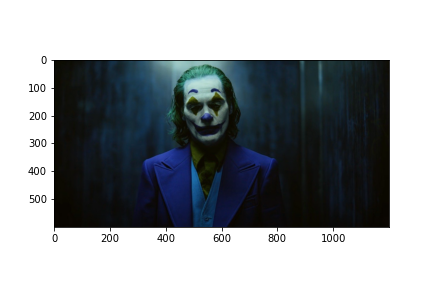

In [170]:
img_main=cv2.imread('joker.jpg',1) 
%matplotlib notebook
plt.imshow(img_main)
#68,308 465,523

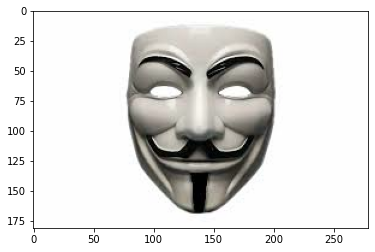

In [142]:
img_logo=cv2.imread('anonymous mask.jpg',-1) 
%matplotlib inline
resized_logo = cv2.resize(img_logo, (0,0), fx=0.2, fy=0.2) 
plt.imshow(img_logo)

## Transformation

These shapes must be equal (45, 45, 3) (45, 45, 3)


Text(0.5, 1.0, 'Final Result')

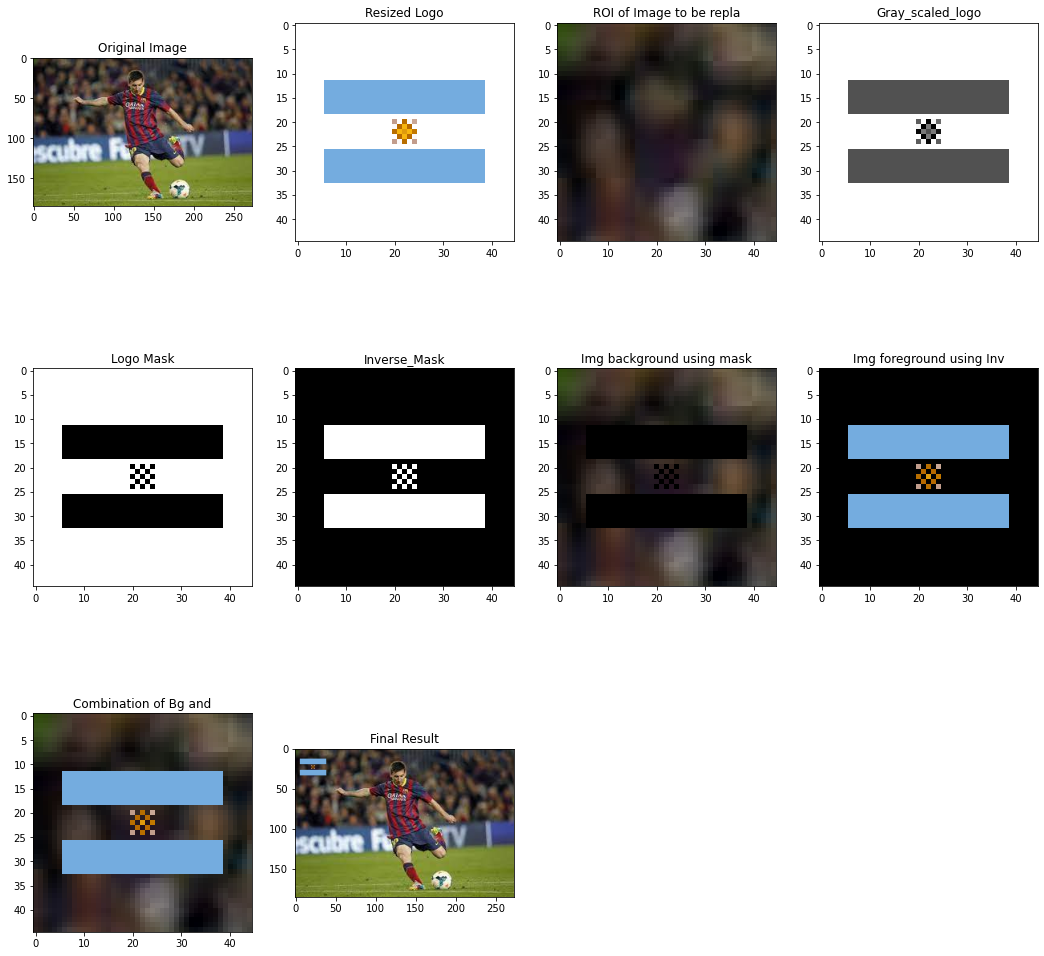

In [146]:
imglogo=cv2.imread('argentina.png',1) 
img_main=cv2.imread('massi.jpg',1) 
original = img_main.copy()

# Since the original logo was pretty big we will reduce the size 
resized_logo = cv2.resize(imglogo, (0,0), fx=0.2, fy=0.2) 
rows,cols,channels = resized_logo.shape

# Putting logo on top-left corner so I will grab the top right portion of main im 
roi = img_main[0:rows, 0:cols] 
theroi = roi.copy()

# Now we convert the image to greyscale for thresholding 
img2gray = cv2.cvtColor(resized_logo,cv2.COLOR_BGR2GRAY)

# Threshold the Image to get the Required Mask

# The value 180 works for this particular logo,it may be different for other Imag ret, 
ret , mask = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY)

# Getting the Inverse Mask 
mask_inv = cv2.bitwise_not(mask)

# Remember the shapes of roi and the resized_logo must match 
print('These shapes must be equal', roi.shape,resized_logo.shape) 
img_bg = cv2.bitwise_and(roi,roi,mask = mask)

# Take only region of logo from logo image. 
img_fg = cv2.bitwise_and(resized_logo,resized_logo,mask = mask_inv)

combined = cv2.add(img_bg,img_fg) 
img_main[0:rows, 0:cols ] = combined


plt.figure(figsize=[18,18])
#%matplotlib inline
plt.subplot(341);plt.imshow(original[:,:,::-1]);plt.title("Original Image") 
plt.subplot(342);plt.imshow(resized_logo[:,:,::-1]);plt.title("Resized Logo") 
plt.subplot(343);plt.imshow(theroi[:,:,::-1]);plt.title("ROI of Image to be repla")
plt.subplot(344);plt.imshow(img2gray,cmap='gray');plt.title("Gray_scaled_logo") 
plt.subplot(345);plt.imshow(mask,cmap='gray');plt.title("Logo Mask")
plt.subplot(346);plt.imshow(mask_inv,cmap='gray');plt.title("Inverse_Mask")
plt.subplot(347);plt.imshow(img_bg[:,:,::-1]);plt.title("Img background using mask")
plt.subplot(348);plt.imshow(img_fg[:,:,::-1]);plt.title("Img foreground using Inv") 
plt.subplot(349);plt.imshow(combined[:,:,::-1]);plt.title("Combination of Bg and") 
plt.subplot(3,4,10);plt.imshow(img_main[:,:,::-1]);plt.title("Final Result")

These shapes must be equal (36, 56, 3) (36, 56, 3)


Text(0.5, 1.0, 'Final Result')

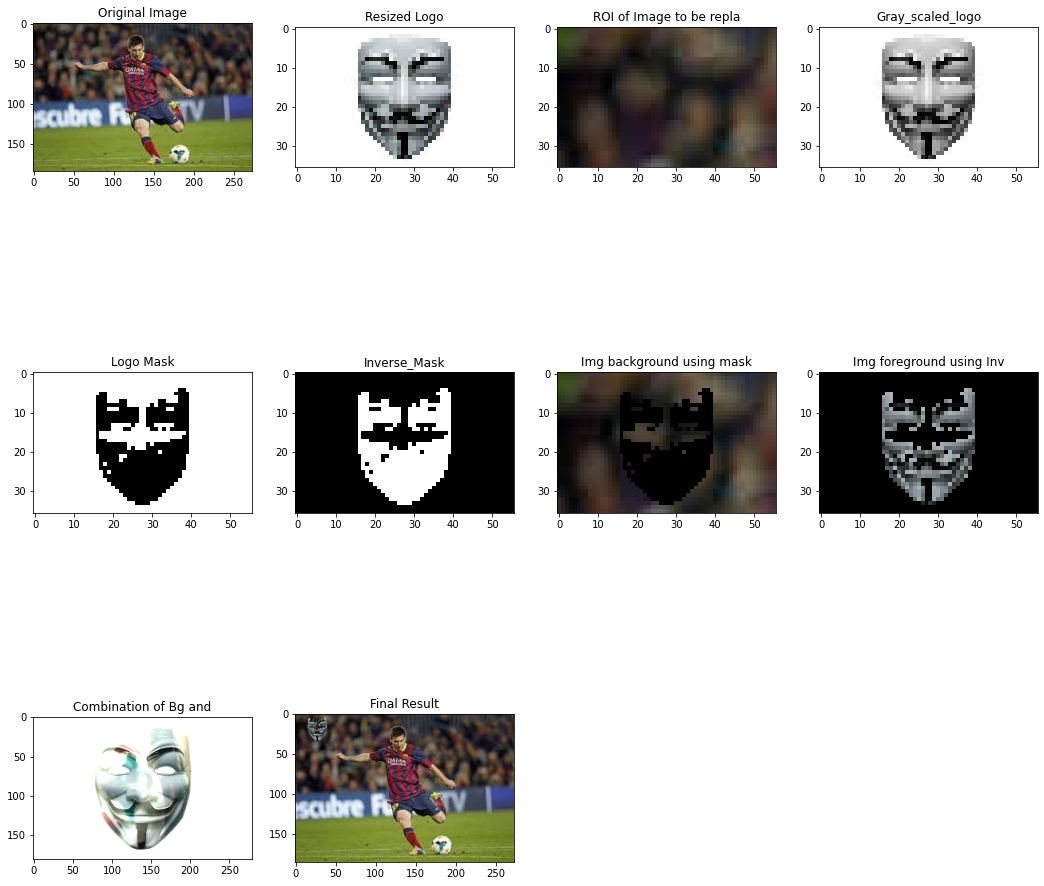

In [150]:
imglogo=cv2.imread('anonymous mask.jpg',1) 
img_main=cv2.imread('massi.jpg',1) 
original = img_main.copy()

# Since the original logo was pretty big we will reduce the size 
resized_logo = cv2.resize(imglogo, (0,0), fx=0.2, fy=0.2) 
rows,cols,channels = resized_logo.shape

# Putting logo on top-left corner so I will grab the top right portion of main im 
roi = img_main[0:rows, 0:cols] 
theroi = roi.copy()

# Now we convert the image to greyscale for thresholding 
img2gray = cv2.cvtColor(resized_logo,cv2.COLOR_BGR2GRAY)

# Threshold the Image to get the Required Mask

# The value 180 works for this particular logo,it may be different for other Imag ret, 
ret , mask = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY)

# Getting the Inverse Mask 
mask_inv = cv2.bitwise_not(mask)

# Remember the shapes of roi and the resized_logo must match 
print('These shapes must be equal', roi.shape,resized_logo.shape) 
img_bg = cv2.bitwise_and(roi,roi,mask = mask)

# Take only region of logo from logo image. 
img_fg = cv2.bitwise_and(resized_logo,resized_logo,mask = mask_inv)

Combined = cv2.add(img_bg,img_fg) 
img_main[0:rows, 0:cols ] = Combined


plt.figure(figsize=[18,18])
#%matplotlib inline
plt.subplot(341);plt.imshow(original[:,:,::-1]);plt.title("Original Image") 
plt.subplot(342);plt.imshow(resized_logo[:,:,::-1]);plt.title("Resized Logo") 
plt.subplot(343);plt.imshow(theroi[:,:,::-1]);plt.title("ROI of Image to be repla")
plt.subplot(344);plt.imshow(img2gray,cmap='gray');plt.title("Gray_scaled_logo") 
plt.subplot(345);plt.imshow(mask,cmap='gray');plt.title("Logo Mask")
plt.subplot(346);plt.imshow(mask_inv,cmap='gray');plt.title("Inverse_Mask")
plt.subplot(347);plt.imshow(img_bg[:,:,::-1]);plt.title("Img background using mask")
plt.subplot(348);plt.imshow(img_fg[:,:,::-1]);plt.title("Img foreground using Inv") 
plt.subplot(349);plt.imshow(combined[:,:,::-1]);plt.title("Combination of Bg and") 
plt.subplot(3,4,10);plt.imshow(img_main[:,:,::-1]);plt.title("Final Result")

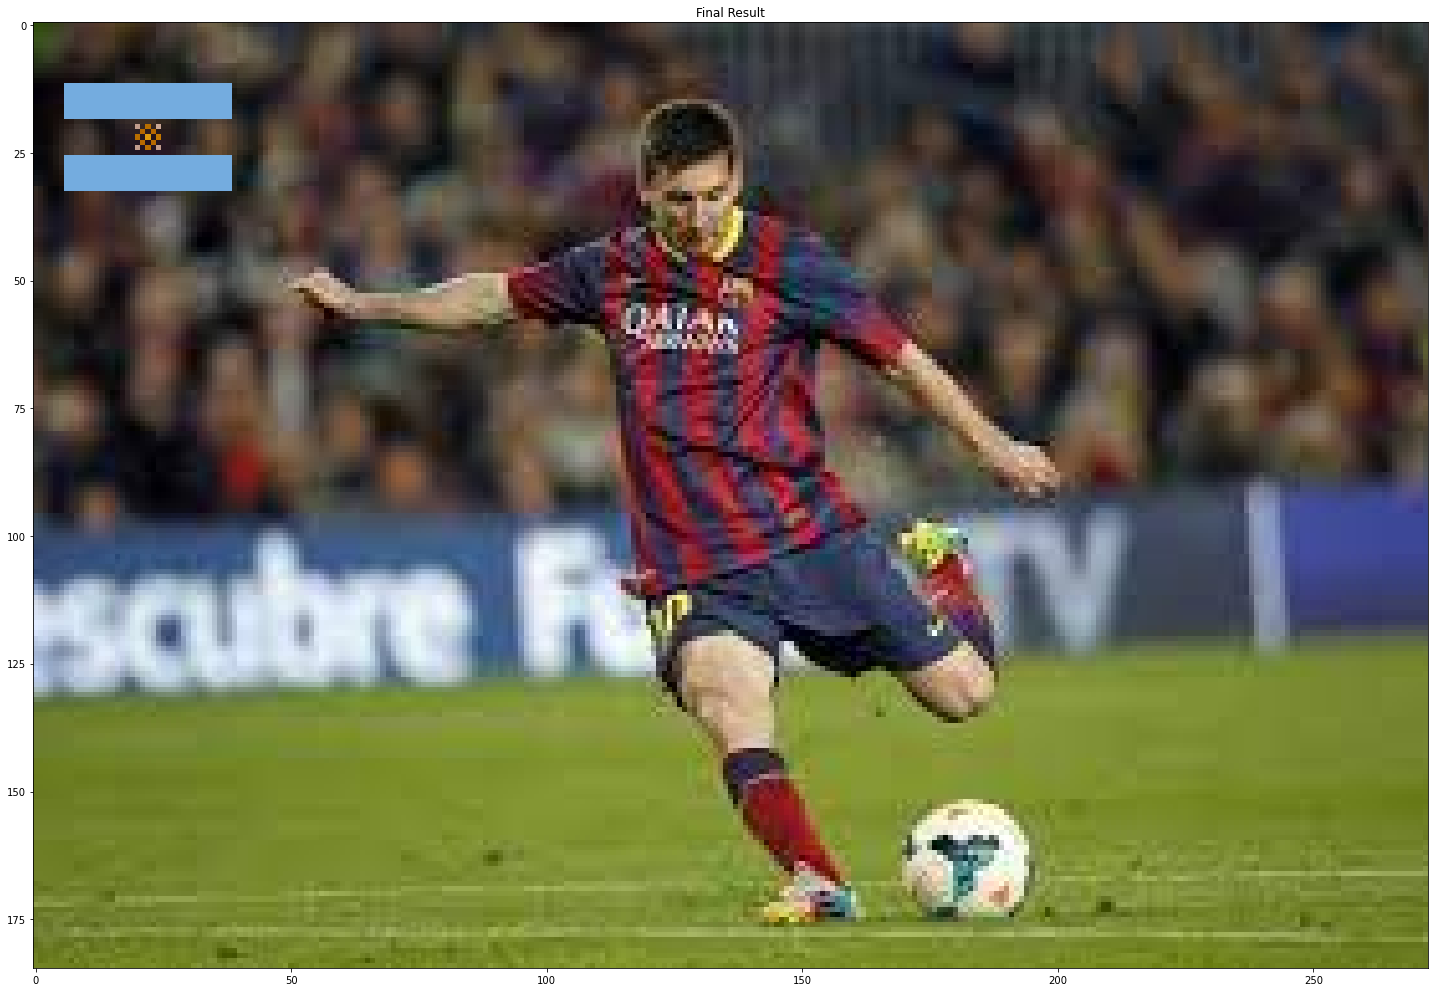

In [120]:
plt.figure(figsize=[25,25])

plt.imshow(img_main[:,:,::-1]);plt.title("Final Result");

These 2 shapes should be equal (183, 275, 3) (183, 275, 3)


Text(0.5, 1.0, 'Modified Image')

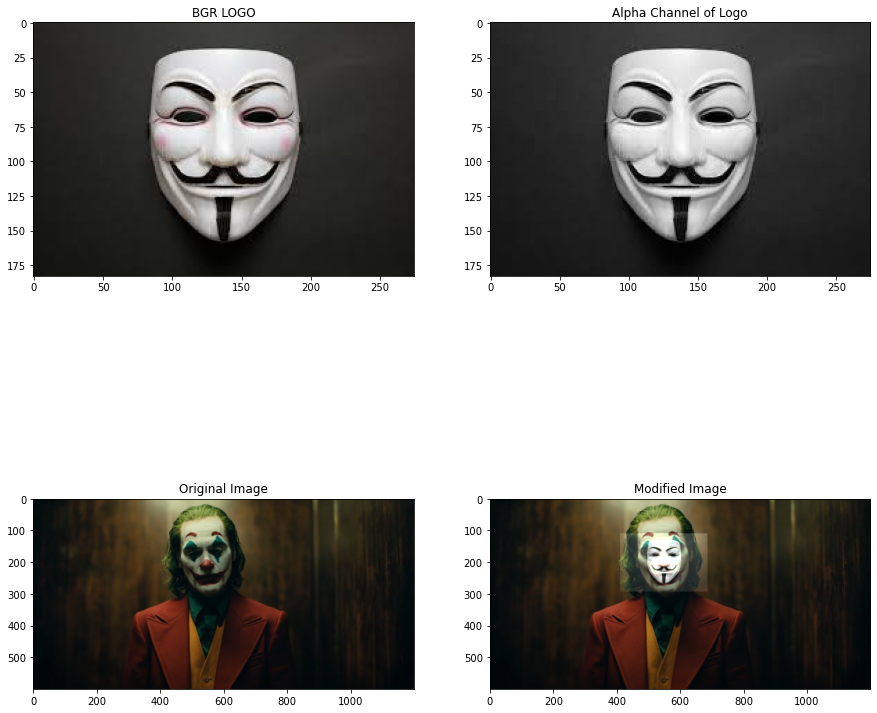

In [174]:
resized_logo=cv2.imread('anonymous mask.jpg',-1) 
img_main=cv2.imread('joker.jpg',1) 
original = img_main.copy()

# ADD CODE WHERE MENTIONED 
#resized_logo = cv2.resize(img_logo, (0,0), fx=0.2 ,fy=0.2) 

rows,cols,channels = resized_logo.shape

constant =  111
constant2 = 410

roi = img_main[constant:rows+constant, constant2:cols+constant2]

mask = resized_logo[:,:,-1] # the 4th channel is the alpha channnel, its essenti 
resized_logo_bgr = resized_logo[:,:,:3] # removing the alpha mask to have a regu 
print('These 2 shapes should be equal', resized_logo.shape,roi.shape)

mask_inv = cv2.bitwise_not(mask)

img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

img2_fg = cv2.bitwise_and(resized_logo_bgr,resized_logo_bgr,mask = mask)

combined = cv2.add(img1_bg,img2_fg)

img_main[constant:rows+constant, constant2:cols+constant2] = combined

plt.figure(figsize=[15,15])

plt.subplot(221);plt.imshow(resized_logo_bgr[:,:,::-1]);plt.title("BGR LOGO")
plt.subplot(222);plt.imshow(mask,cmap='gray');plt.title("Alpha Channel of Logo") 
plt.subplot(223);plt.imshow(original[:,:,::-1]);plt.title("Original Image") 
plt.subplot(224);plt.imshow(img_main[:,:,::-1]);plt.title("Modified Image")

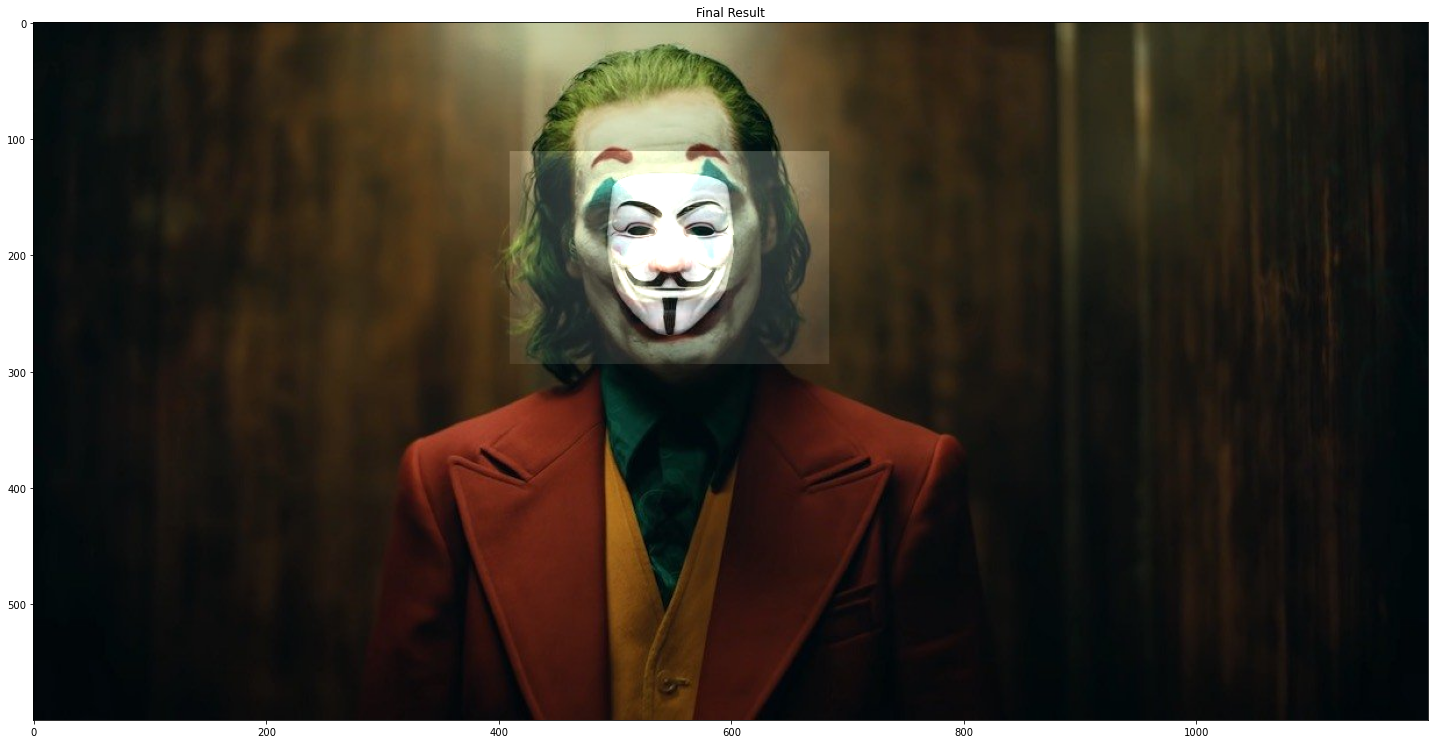

In [175]:
plt.figure(figsize=[25,25])

plt.imshow(img_main[:,:,::-1]);plt.title("Final Result");